In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

# Lavori attivati in Lombardia
# https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-prorogati/chng-cman
attivati = pd.read_csv("../Data/attivati.csv", sep=',')
# Lavori terminati in Lombardia
# https://www.dati.lombardia.it/Attivit-Produttive/Rapporti-di-lavoro-cessati/nwz3-p6vm
terminati = pd.read_csv("../Data/cessati.csv", sep=',')
# Lavori avviati a Milano
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Avviati-al-lavoro/wctn-fraz
milano_avviati = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Avviati_al_lavoro.csv", sep=',')
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Disponibili-al-lavoro/dhjc-ne6a
milano_avviati_eta = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Avviati_al_lavoro_per_fascia_di_et_.csv", sep=',')
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Avviati-al-lavoro-per-g/8umh-xns4
milano_avviati_genere = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Avviati_al_lavoro_per_genere.csv", sep=',')
# Lavoratori disponibili a Milano
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Disponibili-al-lavoro-p/pwjm-3s2u
milano_disponibili = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Disponibili_al_lavoro.csv", sep=',')
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Avviati-al-lavoro-per-f/bs8q-3h43
milano_disponibili_eta = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Disponibili_al_lavoro_per_fascia_di_et_.csv", sep=',')
# https://www.dati.lombardia.it/Attivit-Produttive/CITTA-METROPOLITANA-MILANO-Disponibili-al-lavoro-p/4pyw-z4yi
milano_disponibili_genere = pd.read_csv("../Data/CITTA_METROPOLITANA_MILANO_-_Disponibili_al_lavoro_per_genere.csv", sep=',')

In [ ]:
# Lunghezze datasets originali
len(attivati), len(terminati), len(milano_avviati), len(milano_avviati_eta), len(milano_disponibili), len(milano_disponibili_eta), len(milano_disponibili_genere)

(9120538, 3728237, 10584, 95256, 10584, 95256, 21168)

In [ ]:
# Tolgo mese e giorno da date e lascio solo l'anno
attivati.DATA = attivati.DATA.map((lambda x: x[-4:])).astype(int)
terminati.DATA = terminati.DATA.map((lambda x: x[-4:])).astype(int)

In [ ]:
# Record completi durante gli anni 2008 < anni < 2022, di eta > 15
attivati = attivati[attivati.DATA < 2023].dropna()
attivati = attivati[attivati.ETA > 15]
attivati = attivati[attivati.DATA > 2008]
terminati = terminati[terminati.DATA < 2023].dropna()
terminati = terminati[terminati.ETA > 15]
terminati = terminati[terminati.DATA > 2008]
milano_avviati = milano_avviati.dropna() # Gia completo
milano_avviati_eta = milano_avviati_eta.dropna() # Gia completo
milano_avviati_genere = milano_avviati_genere.dropna() # Gia completo
milano_disponibili = milano_disponibili.dropna() # Gia completo
milano_disponibili_eta = milano_disponibili_eta.dropna() # Gia completo
milano_disponibili_genere = milano_disponibili_genere.dropna() # Gia completo

In [ ]:
# Lunghezze datasets puliti
len(attivati), len(terminati), len(milano_avviati), len(milano_avviati_eta), len(milano_disponibili), len(milano_disponibili_eta), len(milano_disponibili_genere)

(9120538, 3728237, 10584, 95256, 10584, 95256, 21168)

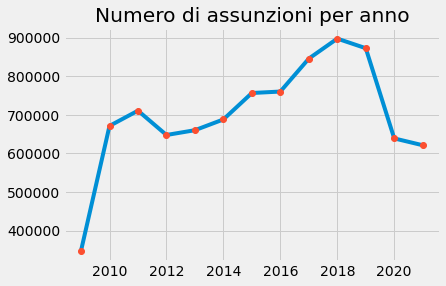

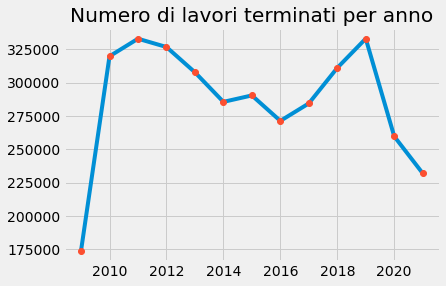

In [ ]:
# Il numero di lavori attivati per anno dopo il 2008 (Prima i valori non sono completi)
N_attivati_anno = attivati['DATA'].value_counts().sort_index()
N_attivati_anno.plot()
plt.plot(N_attivati_anno.index, N_attivati_anno.values, 'o')
plt.title("Numero di assunzioni per anno")
plt.show()
# Vediamo un grande aumento dal 2009 (forse dato da dati incompleti)
# Vediamo una grande diminuzione a partire dal 2020, data dall'inizio della pandemia COVID 

# Il numero di lavori terminati per anno
N_terminati_anno = terminati['DATA'].value_counts().sort_index()
N_terminati_anno.plot()
plt.plot(N_terminati_anno.index, N_terminati_anno.values, 'o')
plt.title("Numero di lavori terminati per anno")
plt.show()

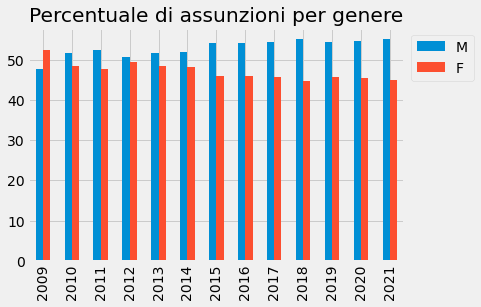

In [92]:
# Lavori attivati per Maschi e Femmmine
M_attivati = attivati[attivati['GENERE'] == 'M']['DATA'].value_counts().sort_index()
F_attivati = attivati[attivati['GENERE'] == 'F']['DATA'].value_counts().sort_index()
M_attivati_norm = M_attivati / (M_attivati + F_attivati) * 100
F_attivati_norm = F_attivati / (M_attivati + F_attivati) * 100
group = np.array([M_attivati_norm, F_attivati_norm]).transpose()
genere_attivati = pd.DataFrame(group, M_attivati.index, columns=['M', 'F'])
genere_attivati.plot.bar()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Percentuale di assunzioni per genere")
plt.show()

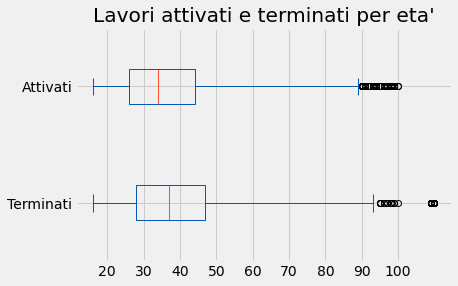

(35.445268689193554, 38.15684088752941)

In [96]:
# Lavori attivati e terminati per eta'
fig, ax = plt.subplots()
bp = ax.boxplot([terminati['ETA'], attivati['ETA']], vert=False, whis=2.5, widths=0.3, patch_artist=True)
for element in ['boxes', 'whiskers', 'fliers', 'caps']:
    plt.setp(bp[element], color="#005AB5")
for patch in bp['boxes']:
    patch.set(facecolor="#FFFFFF00")
ax.set_yticklabels(['Terminati', 'Attivati'])
ax.set_xticks(np.arange(20, 101, 10))
plt.title("Lavori attivati e terminati per eta'")
plt.show()

# Eta' media 
attivati['ETA'].mean(), terminati['ETA'].mean() # 35.4, 38.1

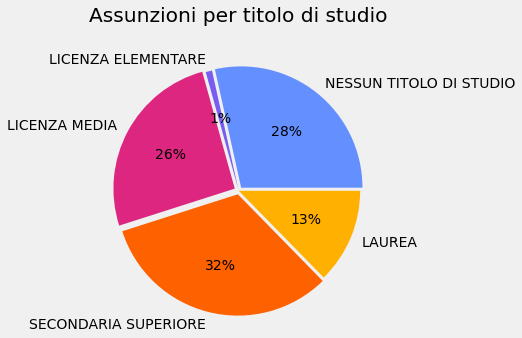

In [9]:
# Percentuale di assunzioni per titolo di studio
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("TITOLO DI ISTRUZIONE SECONDARIA SUPERIORE (SCOLASTICA ED EXTRA-SCOLASTICA) CHE NON PERMETTE L'ACCESSO ALL'UNIVERSITÀ ()", "SECONDARIA SUPERIORE")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("DIPLOMA DI ISTRUZIONE SECONDARIA SUPERIORE  CHE PERMETTE L'ACCESSO ALL'UNIVERSITA", "SECONDARIA SUPERIORE")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("LAUREA - Vecchio o nuovo ordinamento", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("DIPLOMA UNIVERSITARIO", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("DIPLOMA DI SPECIALIZZAZIONE", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("TITOLO DI DOTTORE DI RICERCA", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("DIPLOMA TERZIARIO EXTRA-UNIVERSITARIO", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("MASTER UNIVERSITARIO DI PRIMO LIVELLO", "LAUREA")
attivati['TITOLOSTUDIO'] = attivati['TITOLOSTUDIO'].replace("TITOLO DI STUDIO POST-LAUREA", "LAUREA")
titolo_lavoro = attivati['TITOLOSTUDIO'].value_counts().reindex(["NESSUN TITOLO DI STUDIO", "LICENZA ELEMENTARE", "LICENZA MEDIA", "SECONDARIA SUPERIORE", "LAUREA"])
fact = 1.5
exploded = [0.028*fact, 0.013*fact, 0.032*fact, 0.026*fact, 0.001*fact]
titolo_lavoro.plot.pie(explode=exploded, labeldistance=1.1, radius=1.3, autopct='%1.0f%%', colors=["#648FFF", "#785EF0", "#DC267F", "#FE6100", "#FFB000"], pctdistance=0.6)
plt.ylabel('')
plt.title("Assunzioni per titolo di studio", y=1.2)
plt.show()

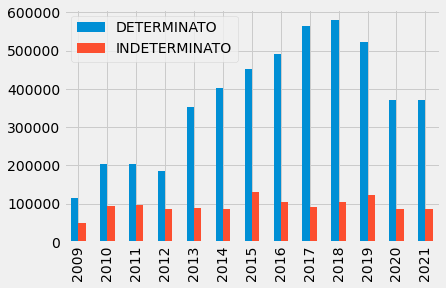

In [97]:
# Percentuale lavori a tempo determinato, indeterminato
contratti = attivati['CONTRATTO'].value_counts()
tot_contratti = contratti['LAVORO A TEMPO DETERMINATO'] + contratti['LAVORO A TEMPO INDETERMINATO']
contratti['LAVORO A TEMPO DETERMINATO'] / tot_contratti, contratti['LAVORO A TEMPO INDETERMINATO'] / tot_contratti

det_contratti = attivati[attivati.CONTRATTO == 'LAVORO A TEMPO DETERMINATO']['DATA'].value_counts().sort_index()
indet_contratti = attivati[attivati.CONTRATTO == 'LAVORO A TEMPO INDETERMINATO']['DATA'].value_counts().sort_index()
mix_contratti = np.array([det_contratti, indet_contratti]).transpose()
tipo_contratti = pd.DataFrame(mix_contratti, det_contratti.index, columns=['DETERMINATO', 'INDETERMINATO'])
tipo_contratti.plot.bar()
#plt.title("Assunzioni a tempo determinato e indeterminato")
plt.show()

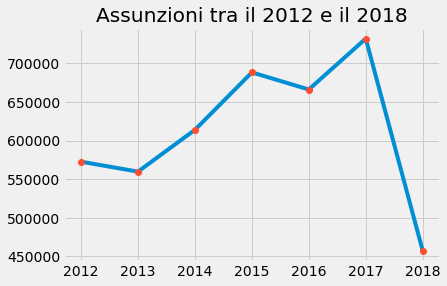

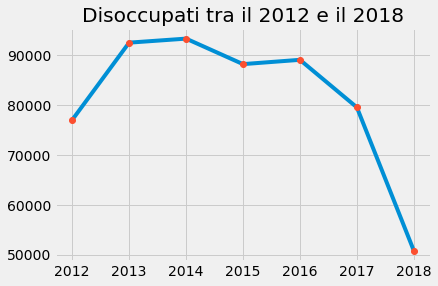

In [11]:
# Numero di lavori avviati tra il 2012 e il 2018 a milano
m_anno_avviati = {2012: 0, 2013: 0, 2014: 0, 2015: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0}
for i, r in milano_avviati.iterrows():
    m_anno_avviati[r.Anno] += r.TotaleAvviati

pd.Series(m_anno_avviati).plot()
plt.plot(m_anno_avviati.keys(), m_anno_avviati.values(), 'o')
plt.title("Assunzioni tra il 2012 e il 2018")
plt.show()

# Numero di disoccupati tra il 2012 e il 2018 a milano
m_anno_disponibili = {2012: 0, 2013: 0, 2014: 0, 2015: 0, 2015: 0, 2016: 0, 2017: 0, 2018: 0}
for i, r in milano_disponibili.iterrows():
    m_anno_disponibili[r.Anno] += r.TotaleDisponibili

pd.Series(m_anno_disponibili).plot()
plt.plot(m_anno_disponibili.keys(), m_anno_disponibili.values(), 'o')
plt.title("Disoccupati tra il 2012 e il 2018")
plt.show()

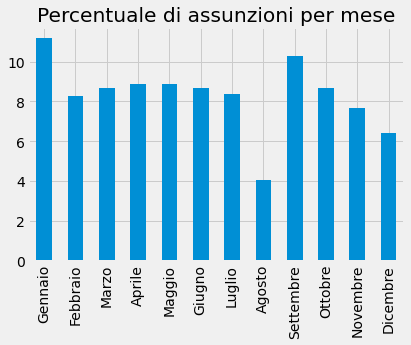

In [12]:
def i_to_mese(i):
    if i == 1: return "Gennaio"
    if i == 2: return "Febbraio"
    if i == 3: return "Marzo"
    if i == 4: return "Aprile"
    if i == 5: return "Maggio"
    if i == 6: return "Giugno"
    if i == 7: return "Luglio"
    if i == 8: return "Agosto"
    if i == 9: return "Settembre"
    if i == 10: return "Ottobre"
    if i == 11: return "Novembre"
    if i == 12: return "Dicembre"

# Numero di assunzioni per mese
m_mese_attivati = {"Gennaio": 0, "Febbraio": 0, "Marzo": 0, "Aprile": 0, "Maggio": 0, "Giugno": 0, "Luglio": 0, "Agosto": 0, "Settembre": 0, "Ottobre": 0, "Novembre": 0, "Dicembre": 0}
for i, r in milano_avviati.iterrows():
    m_mese_attivati[i_to_mese(r.Mese)] += r.TotaleAvviati

# Percentuale di assunzioni per mese
(pd.Series(m_mese_attivati) * 100 /(pd.Series(m_mese_attivati).sum())).plot.bar()
plt.title("Percentuale di assunzioni per mese")
plt.show()

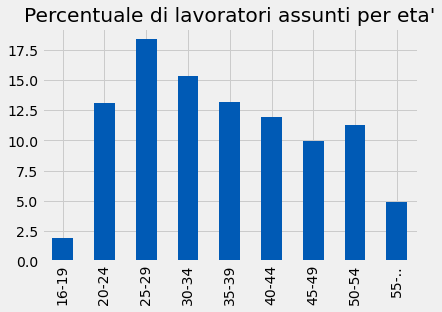

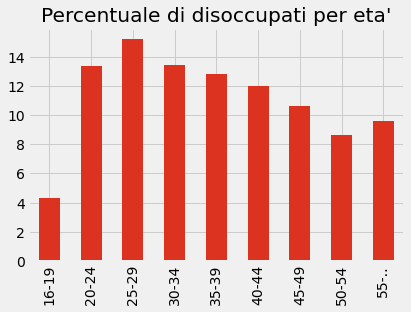

In [100]:
def etaToRange(fascia):
    if fascia == "fino a 19 anni": return "16-19"
    if fascia == "da 20 a 24 anni": return "20-24"
    if fascia == "da 25 a 29 anni": return "25-29"
    if fascia == "da 30 a 34 anni": return "30-34"
    if fascia == "da 35 a 39 anni": return "35-39"
    if fascia == "da 40 a 44 anni": return "40-44"
    if fascia == "da 45 a 49 anni": return "45-49"
    if fascia == "da 50 a 54 anni": return "50-54"
    if fascia == "da 55 anni": return "55-.."

m_eta_avviati = {"16-19": 0, "20-24": 0, "25-29": 0, "30-34": 0, \
    "35-39": 0, "40-44": 0, "45-49": 0, "50-54": 0, "55-..": 0}

for i, r in milano_avviati_eta.iterrows():
    m_eta_avviati[etaToRange(r.FasciaEta)] += r.TotaleAvviati

m_eta_disponibili = {"16-19": 0, "20-24": 0, "25-29": 0, "30-34": 0, \
    "35-39": 0, "40-44": 0, "45-49": 0, "50-54": 0, "55-..": 0}

for i, r in milano_disponibili_eta.iterrows():
    m_eta_disponibili[etaToRange(r.FasciaEta)] += r.TotaleDisponibili

# Lavoratori assunti per eta'
s_eta_avviati = pd.Series(m_eta_avviati) / pd.Series(m_eta_avviati).sum() * 100
s_eta_avviati.plot.bar(color="#005AB5")
plt.title("Percentuale di lavoratori assunti per eta'")
plt.show()

# Disoccupati per eta'
s_eta_disponibili = pd.Series(m_eta_disponibili) / pd.Series(m_eta_disponibili).sum() * 100
s_eta_disponibili.plot.bar(color="#DC3220")
plt.title("Percentuale di disoccupati per eta'")
plt.show()

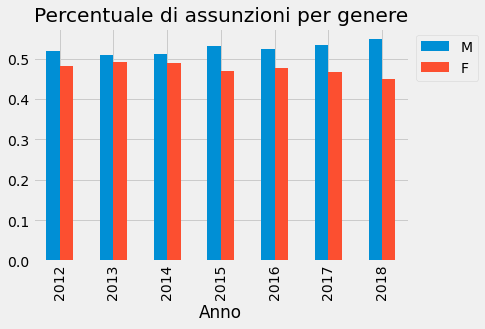

In [94]:
# Percentuale di assunzioni tra maschi e femmine
M_genere_avviati = milano_avviati_genere[milano_avviati_genere['Genere'] == 'M'].groupby("Anno").sum().drop(columns="Mese")
F_genere_avviati = milano_avviati_genere[milano_avviati_genere['Genere'] == 'F'].groupby("Anno").sum().drop(columns="Mese")
M_norm = M_genere_avviati / (M_genere_avviati + F_genere_avviati)
F_norm = F_genere_avviati / (M_genere_avviati + F_genere_avviati)
group = np.array([M_norm.values, F_norm.values]).transpose()[0]
m_genere_avviati = pd.DataFrame(group, M_genere_avviati.index, columns=['M', 'F'])
m_genere_avviati.plot.bar()
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title("Percentuale di assunzioni per genere")
plt.show()